Check for every metric what is normal.
Then select values that is outside this normal and check how the correlation varies.

Cluster the data

Check if we can regress a range instead of just a line

# Day 1

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df_original = pd.read_csv('20200124_ews_observations.csv', low_memory=False)
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)
df.dtypes

PatientId            int64
ObservationDate     object
EwsProcedure        object
EWS_Total            int64
SBP                float64
SBP_Score          float64
LOC                 object
LOC_Score            int64
SpO2               float64
SpO2_Score         float64
Add_O2              object
Add_O2_Score       float64
HR                   int64
HR_Score             int64
RR                   int64
RR_Score             int64
TEMP               float64
TEMP_Score           int64
dtype: object

In [47]:
df.head().T

,0,1,2,3,4
PatientId,29,30,31,32,33
ObservationDate,2019-05-01 13:27:50.0000000,2019-05-01 15:27:44.0000000,2019-05-01 15:54:27.0000000,2019-05-01 16:07:27.0000000,2019-05-01 17:03:16.0000000
EwsProcedure,NEWS2,NEWS2,NEWS2,NEWS2,NEWS2
EWS_Total,0,3,1,0,0
SBP,143,NaN,117,NaN,135
SBP_Score,0,NaN,0,NaN,0
LOC,ALERT,ALERT,ALERT,ALERT,ALERT
LOC_Score,0,0,0,0,0
SpO2,96,94,95,98,97
SpO2_Score,0,1,1,0,0


In [48]:
df.shape

(171736, 18)

In [49]:
number_of_patients = df.PatientId.nunique()
number_of_patients

10136

In [50]:
for col in df:
    print(f"{col}: {df[col].nunique()}")

PatientId: 10136
ObservationDate: 170783
EwsProcedure: 1
EWS_Total: 17
SBP: 177
SBP_Score: 4
LOC: 5
LOC_Score: 2
SpO2: 64
SpO2_Score: 4
Add_O2: 2
Add_O2_Score: 2
HR: 180
HR_Score: 4
RR: 82
RR_Score: 4
TEMP: 78
TEMP_Score: 4


In [51]:
df_timesorted = df.sort_values(by='ObservationDate', ascending=True)
df_timesorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
1,30,2019-05-01 15:27:44.0000000,NEWS2,3,NaN,NaN,ALERT,0,94.0,1.0,False,0.0,83,0,16,0,36.5,0
2,31,2019-05-01 15:54:27.0000000,NEWS2,1,117.0,0.0,ALERT,0,95.0,1.0,False,0.0,75,0,14,0,37.3,0
3,32,2019-05-01 16:07:27.0000000,NEWS2,0,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,85,0,19,0,37.2,0
4,33,2019-05-01 17:03:16.0000000,NEWS2,0,135.0,0.0,ALERT,0,97.0,0.0,False,0.0,89,0,14,0,36.1,0


In [52]:
df_timesorted = df.sort_values(by='ObservationDate', ascending=False)
df_timesorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
171735,4853,2020-01-02 09:03:56.0000000,NEWS2,1,133.0,0.0,ALERT,0,98.0,0.0,False,0.0,84,0,15,0,35.9,1
171734,20527,2020-01-02 09:03:20.0000000,NEWS2,0,129.0,0.0,ALERT,0,98.0,0.0,False,0.0,70,0,16,0,36.5,0
171733,2499,2020-01-02 09:03:14.0000000,NEWS2,0,118.0,0.0,ALERT,0,98.0,0.0,False,0.0,82,0,20,0,36.2,0
171732,20480,2020-01-02 08:58:46.0000000,NEWS2,3,83.0,3.0,ALERT,0,92.0,0.0,False,0.0,79,0,18,0,36.8,0
171731,20278,2020-01-02 08:57:05.0000000,NEWS2,3,88.0,3.0,ALERT,0,100.0,0.0,False,0.0,72,0,14,0,36.1,0


In [53]:
df_patientsorted = df.sort_values(by='PatientId', ascending=True)
df_patientsorted.head()

,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,2019-05-01 13:27:50.0000000,NEWS2,0,143.0,0.0,ALERT,0,96.0,0.0,False,0.0,80,0,18,0,36.6,0
461,30,2019-05-05 13:04:58.0000000,NEWS2,5,97.0,2.0,ALERT,0,96.0,0.0,False,0.0,90,0,28,3,36.2,0
78,30,2019-05-03 00:27:55.0000000,NEWS2,3,85.0,3.0,ALERT,0,99.0,0.0,False,0.0,79,0,18,0,36.2,0
77,30,2019-05-03 00:13:42.0000000,NEWS2,1,146.0,0.0,ALERT,0,100.0,0.0,False,0.0,94,1,15,0,36.2,0
922,30,2019-05-07 09:46:43.0000000,NEWS2,3,97.0,2.0,ALERT,0,95.0,1.0,False,0.0,87,0,16,0,36.1,0


In [54]:
patient_observations = df['PatientId'].value_counts().sort_values()
patient_observations

2047      1
7776      1
929       1
3232      1
7992      1
       ... 
1841    351
630     356
1261    441
5797    441
1743    643
Name: PatientId, Length: 10136, dtype: int64

In [55]:
def info_patient(id_nr):
    patient = df.loc[df['PatientId'] == id_nr]
    patient = patient.sort_values(by='ObservationDate', ascending=False)
    n_measurements = patient.shape[1]
    print(f"Number of measurements: {n_measurements}")
    if n_measurements > 1:
        start_date = patient["ObservationDate"].iloc[0]
        end_date = patient["ObservationDate"].iloc[-1]
        #hospitalisation_time = end_date - start_date
        print(f"start_date: {start_date}")
        print(f"end_date: {end_date}")
    else:
        print("1 measurement")
        

In [56]:
info_patient(31)

Number of measurements: 18
start_date: 2019-05-11 08:51:31.0000000
end_date: 2019-05-01 15:54:27.0000000


# Day 2

-check HR normal rates  
-delete one liners and check correlation  
-see if correlation betters when removing data that is above the normal range

In [57]:
#check mean for SBP
sbp = df['SBP'].dropna()
mean_sbp = round(sbp.mean(),0)
print(mean_sbp)

df_cleaned = df.drop(['ObservationDate', 'EwsProcedure', 'Add_O2', 'LOC'], axis=1)
df_cleaned = df_cleaned.fillna(mean_sbp)
df_cleaned.head()

121.0


,PatientId,EWS_Total,SBP,SBP_Score,LOC_Score,SpO2,SpO2_Score,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
0,29,0,143.0,0.0,0,96.0,0.0,0.0,80,0,18,0,36.6,0
1,30,3,121.0,121.0,0,94.0,1.0,0.0,83,0,16,0,36.5,0
2,31,1,117.0,0.0,0,95.0,1.0,0.0,75,0,14,0,37.3,0
3,32,0,121.0,121.0,0,98.0,0.0,0.0,85,0,19,0,37.2,0
4,33,0,135.0,0.0,0,97.0,0.0,0.0,89,0,14,0,36.1,0


### Check HR

In [58]:
df_cleaned.corr()

,PatientId,EWS_Total,SBP,SBP_Score,LOC_Score,SpO2,SpO2_Score,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
PatientId,1.000000,-0.030384,0.008640,-0.015686,0.011073,0.027183,-0.025045,-0.014758,-0.057268,-0.049046,-0.029104,0.004818,0.009706,-0.001624
EWS_Total,-0.030384,1.000000,-0.334304,0.086900,0.135683,-0.274377,0.426232,0.555040,0.426665,0.464483,0.394173,0.496666,0.120622,0.121473
SBP,0.008640,-0.334304,1.000000,-0.015721,-0.008403,0.006721,-0.002318,-0.041954,-0.057242,-0.036181,-0.006171,0.000815,-0.017198,0.017950
SBP_Score,-0.015686,0.086900,-0.015721,1.000000,0.015536,-0.030551,0.030688,0.069677,0.035781,0.045169,0.033430,0.048711,0.022872,0.004198
LOC_Score,0.011073,0.135683,-0.008403,0.015536,1.000000,-0.005956,0.008948,0.017975,0.018421,0.014235,0.028876,0.033740,0.025984,0.007321
SpO2,0.027183,-0.274377,0.006721,-0.030551,-0.005956,1.000000,-0.372701,-0.133213,-0.128971,-0.084030,-0.107647,-0.049572,-0.067439,0.021447
SpO2_Score,-0.025045,0.426232,-0.002318,0.030688,0.008948,-0.372701,1.000000,0.400157,0.091169,0.054468,0.106136,0.051981,0.072941,-0.013491
Add_O2_Score,-0.014758,0.555040,-0.041954,0.069677,0.017975,-0.133213,0.400157,1.000000,0.201951,0.134363,0.200177,0.138314,0.119847,-0.034458
HR,-0.057268,0.426665,-0.057242,0.035781,0.018421,-0.128971,0.091169,0.201951,1.000000,0.733117,0.277900,0.145996,0.243363,-0.071367
HR_Score,-0.049046,0.464483,-0.036181,0.045169,0.014235,-0.084030,0.054468,0.134363,0.733117,1.000000,0.192946,0.133098,0.154444,-0.018245


In [59]:
df_values = df_cleaned.drop(['SBP_Score', 'SpO2_Score', 'HR_Score', 'TEMP_Score', 'RR_Score'], axis=1)
display(df_values.head())
df_values.corr()

,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
0,29,0,143.0,0,96.0,0.0,80,18,36.6
1,30,3,121.0,0,94.0,0.0,83,16,36.5
2,31,1,117.0,0,95.0,0.0,75,14,37.3
3,32,0,121.0,0,98.0,0.0,85,19,37.2
4,33,0,135.0,0,97.0,0.0,89,14,36.1


,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
PatientId,1.000000,-0.030384,0.008640,0.011073,0.027183,-0.014758,-0.057268,-0.029104,0.009706
EWS_Total,-0.030384,1.000000,-0.334304,0.135683,-0.274377,0.555040,0.426665,0.394173,0.120622
SBP,0.008640,-0.334304,1.000000,-0.008403,0.006721,-0.041954,-0.057242,-0.006171,-0.017198
LOC_Score,0.011073,0.135683,-0.008403,1.000000,-0.005956,0.017975,0.018421,0.028876,0.025984
SpO2,0.027183,-0.274377,0.006721,-0.005956,1.000000,-0.133213,-0.128971,-0.107647,-0.067439
Add_O2_Score,-0.014758,0.555040,-0.041954,0.017975,-0.133213,1.000000,0.201951,0.200177,0.119847
HR,-0.057268,0.426665,-0.057242,0.018421,-0.128971,0.201951,1.000000,0.277900,0.243363
RR,-0.029104,0.394173,-0.006171,0.028876,-0.107647,0.200177,0.277900,1.000000,0.160365
TEMP,0.009706,0.120622,-0.017198,0.025984,-0.067439,0.119847,0.243363,0.160365,1.000000


### Delete one liners

In [83]:
def make_dataframe_returning_patients(df, measurements):
    patient_observations_dict = df['PatientId'].value_counts().to_dict()
    
    pat_list = {k: v for k, v in patient_observations.items() if v < measurements}.keys()
    df_ret = df[~df.PatientId.isin(pat_list)]
    
    print(f"Number of patients: {df_ret.PatientId.nunique()}")
    print(f"Measurements: {df_ret.shape[0]}")
    return df_ret

    

In [84]:
df_n = make_dataframe_returning_patients(df_values, 400)
df_n = df_5.sort_values(by=['PatientId'])
df_n.head(5)

    #check if function worked
#df_5.PatientId.value_counts()

Number of patients: 3
Measurements: 1525


,PatientId,EWS_Total,SBP,LOC_Score,SpO2,Add_O2_Score,HR,RR,TEMP
1,30,3,121.0,0,94.0,0.0,83,16,36.5
398,30,3,93.0,0,95.0,0.0,72,18,36.4
596,30,3,91.0,0,94.0,0.0,88,20,36.5
618,30,3,105.0,0,96.0,0.0,88,24,36.1
357,30,4,86.0,0,95.0,0.0,74,15,36.1


In [85]:
# compare pairplots

Text(0.5, 1.0, 'Correlation Heatmap FULL DF')

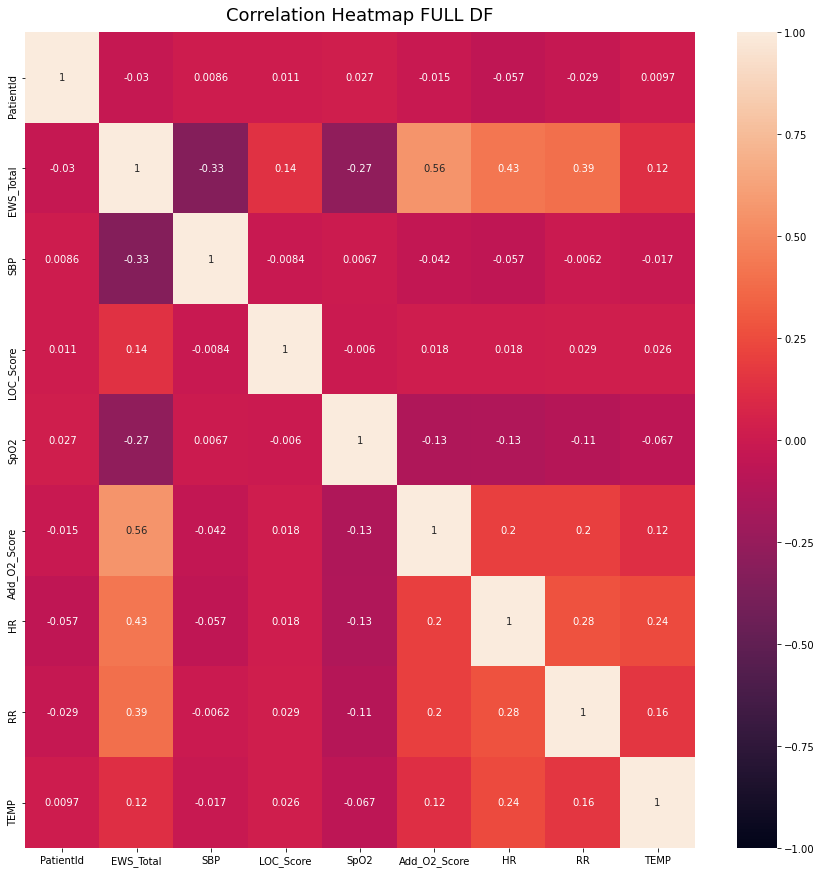

In [86]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_values.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap FULL DF', fontdict={'fontsize':18}, pad=12)

Text(0.5, 1.0, 'Correlation Heatmap DF N')

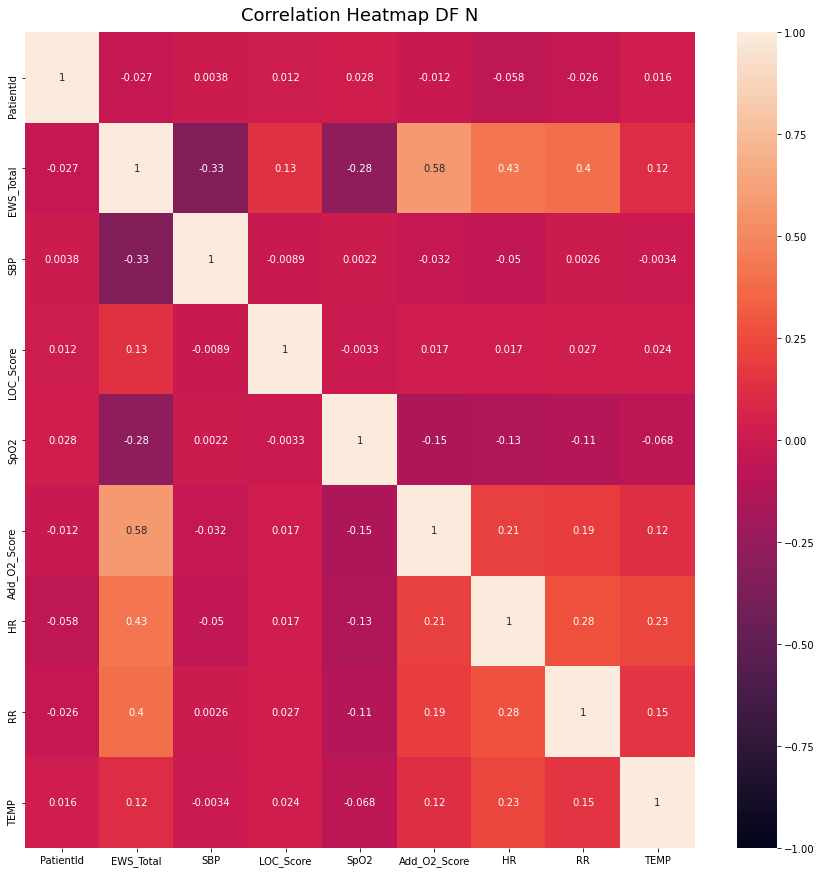

In [87]:
plt.figure(figsize=(15, 15))
heatmap = sns.heatmap(df_n.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap DF N', fontdict={'fontsize':18}, pad=12)

-----------
We can see that it doesn't change much if we leave out one liners or take patients with more then N observations  

In [97]:
df_three_pat = make_dataframe_returning_patients(df, 400)
df_three_pat['ObservationDate'] = pd.to_datetime(df_three_pat['ObservationDate'])
df_three_pat.head()

Number of patients: 3
Measurements: 1525


<ipython-input-97-41f8440fbb98>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_three_pat['ObservationDate'] = pd.to_datetime(df_three_pat['ObservationDate'])


,PatientId,ObservationDate,EwsProcedure,EWS_Total,SBP,SBP_Score,LOC,LOC_Score,SpO2,SpO2_Score,Add_O2,Add_O2_Score,HR,HR_Score,RR,RR_Score,TEMP,TEMP_Score
13868,1261,2019-06-06 05:42:27,NEWS2,3,94.0,2.0,ALERT,0,96.0,0.0,False,0.0,76,0,12,0,36.0,1
14006,1261,2019-06-06 10:14:27,NEWS2,1,107.0,1.0,ALERT,0,99.0,0.0,False,0.0,51,0,18,0,36.9,0
14136,1261,2019-06-06 13:46:07,NEWS2,1,NaN,NaN,ALERT,0,98.0,0.0,False,0.0,70,0,18,0,36.9,0
14311,1261,2019-06-06 19:19:15,NEWS2,1,108.0,1.0,ALERT,0,96.0,0.0,False,0.0,70,0,16,0,37.0,0
14585,1261,2019-06-07 06:06:13,NEWS2,1,104.0,1.0,ALERT,0,99.0,0.0,False,0.0,70,0,16,0,36.8,0


<AxesSubplot:xlabel='ObservationDate', ylabel='EWS_Total'>

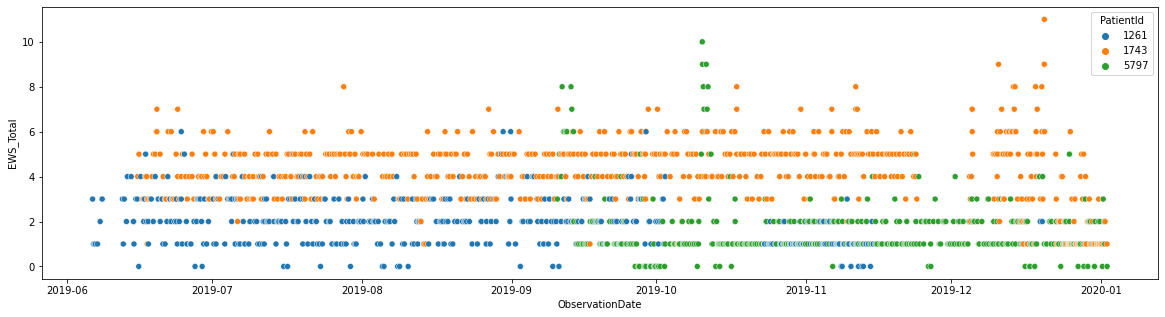

In [111]:
plt.figure(figsize=(20, 5))
sns.scatterplot(data = df_three_pat, x = 'ObservationDate', y = 'EWS_Total', hue='PatientId', palette = "tab10")

We check rico (slope, rate of change) as rolling_average of N samples (maybe it is better to check for N hours).  
Only when rico is above certain value we can raise alarm and maybe do a prediction (regression)  
Rate of change should be on the metrics not the ews total because the step is to high and is harder to measure  